<a href="https://colab.research.google.com/github/Elman295/Paper_with_code/blob/main/LeNet_5_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch 
import torchvision 
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision import transforms
from torch import nn 
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trans = transforms.Compose([
    
    transforms.ToTensor(), 
    transforms.Normalize(mean = 0.5, std = 0.5)
])

training_data = datasets.MNIST(
    
    root = "data", 
    train = True, 
    download = True, 
    transform = trans
)

validation_data = datasets.MNIST(
    
    root = "data",
    train = False, 
    download = True, 
    transform= trans 
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
training_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
image, label = training_data[10] 

classes = training_data.classes

print(image.shape)
print(image.dtype)
print(classes[label])

torch.Size([1, 28, 28])
torch.float32
3 - three


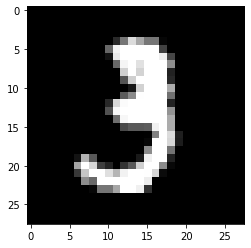

In [8]:
plt.imshow(image.reshape(28,28), cmap = "gray") 
plt.show()

In [9]:
training_dataloader = DataLoader(dataset = training_data, batch_size = 64, shuffle = True)

test_dataloader = DataLoader(dataset = validation_data, batch_size = 64, shuffle = True) 

In [10]:
training_dataloader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [23]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__() 
    self.conv1 = nn.Conv2d(1,6,5) 
    self.pool1 = nn.MaxPool2d(2,2) 
    self.conv2 = nn.Conv2d(6,16,5) 
    self.pool2 = nn.MaxPool2d(2,2) 
    self.fc1 = nn.Linear(16*4*4, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10) 


  def forward(self,x):
    x = self.pool1(F.relu(self.conv1(x))) 
    x = self.pool2(F.relu(self.conv2(x))) 
    x = torch.flatten(x,1) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x)) 
    logits = self.fc3(x) 
    return logits

In [24]:
net = LeNet() 

print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [25]:
noise = torch.randn(size = (1,1,28,28))
predictions = net(noise) 
print(predictions)

tensor([[ 0.1316, -0.0584, -0.0958, -0.0130, -0.0447, -0.0100,  0.0573, -0.0233,
          0.0465, -0.0746]], grad_fn=<AddmmBackward0>)


In [26]:
loss_function = nn.CrossEntropyLoss() 

optimizer_function = torch.optim.Adam(net.parameters(), lr = 1e-3) 

In [27]:
def train(dataloader, model, loss_fn, op_fn):
  size = len(training_dataloader.dataset)
  for batch, (x,y) in enumerate(dataloader): 
    y_pred = model(x) 
    loss = loss_fn(y_pred, y) 

    op_fn.zero_grad()
    loss.backward()
    op_fn.step()

    if batch % 100 ==0:
      loss, current = loss.item(), batch * len(x) 
      print(f"loss is {loss}  [{current} / {size}]")

In [28]:
def test(dataloader, model, loss_fn):

  size = len(dataloader.dataset)
  num_batches = len(dataloader) 
  correct, test_loss = 0,0 
  with torch.no_grad():
    for x,y in dataloader:
      y_pred = model(x) 
      test_loss += loss_fn(y_pred, y).item() 
      correct += (y_pred.argmax(1) == y).type(torch.float).sum().item() 
  test_loss /= num_batches 
  correct /= size 
  print(f"accuracy is {correct*100} test_loss is {test_loss}")


In [30]:
EPOCHS = 20 

for epochs in range(EPOCHS):
  print(f"epoch: {epochs+1} ---------------------------")
  train(training_dataloader, net, loss_function, optimizer_function)
  test(test_dataloader, net, loss_function) 

print('DONE') 

epoch: 1 ---------------------------
loss is 2.3126304149627686  [0 / 60000]
loss is 0.4941868484020233  [6400 / 60000]
loss is 0.1793903261423111  [12800 / 60000]
loss is 0.12981034815311432  [19200 / 60000]
loss is 0.037399761378765106  [25600 / 60000]
loss is 0.0744023397564888  [32000 / 60000]
loss is 0.055091798305511475  [38400 / 60000]
loss is 0.1441328227519989  [44800 / 60000]
loss is 0.029155515134334564  [51200 / 60000]
loss is 0.07677559554576874  [57600 / 60000]
accuracy is 97.98 test_loss is 0.06649770127656827
epoch: 2 ---------------------------
loss is 0.13937954604625702  [0 / 60000]
loss is 0.08356673270463943  [6400 / 60000]
loss is 0.018936295062303543  [12800 / 60000]
loss is 0.23925501108169556  [19200 / 60000]
loss is 0.09205027669668198  [25600 / 60000]
loss is 0.05830616503953934  [32000 / 60000]
loss is 0.059826530516147614  [38400 / 60000]
loss is 0.10446827113628387  [44800 / 60000]
loss is 0.023374509066343307  [51200 / 60000]
loss is 0.034564100205898285 